CIFAR10 데이터셋에서 개와 고양이만으로 이루어진 새로운 데이터셋을 만들고 개인지 고양이인지를 분류하는 모델을 만들겠습니다. 

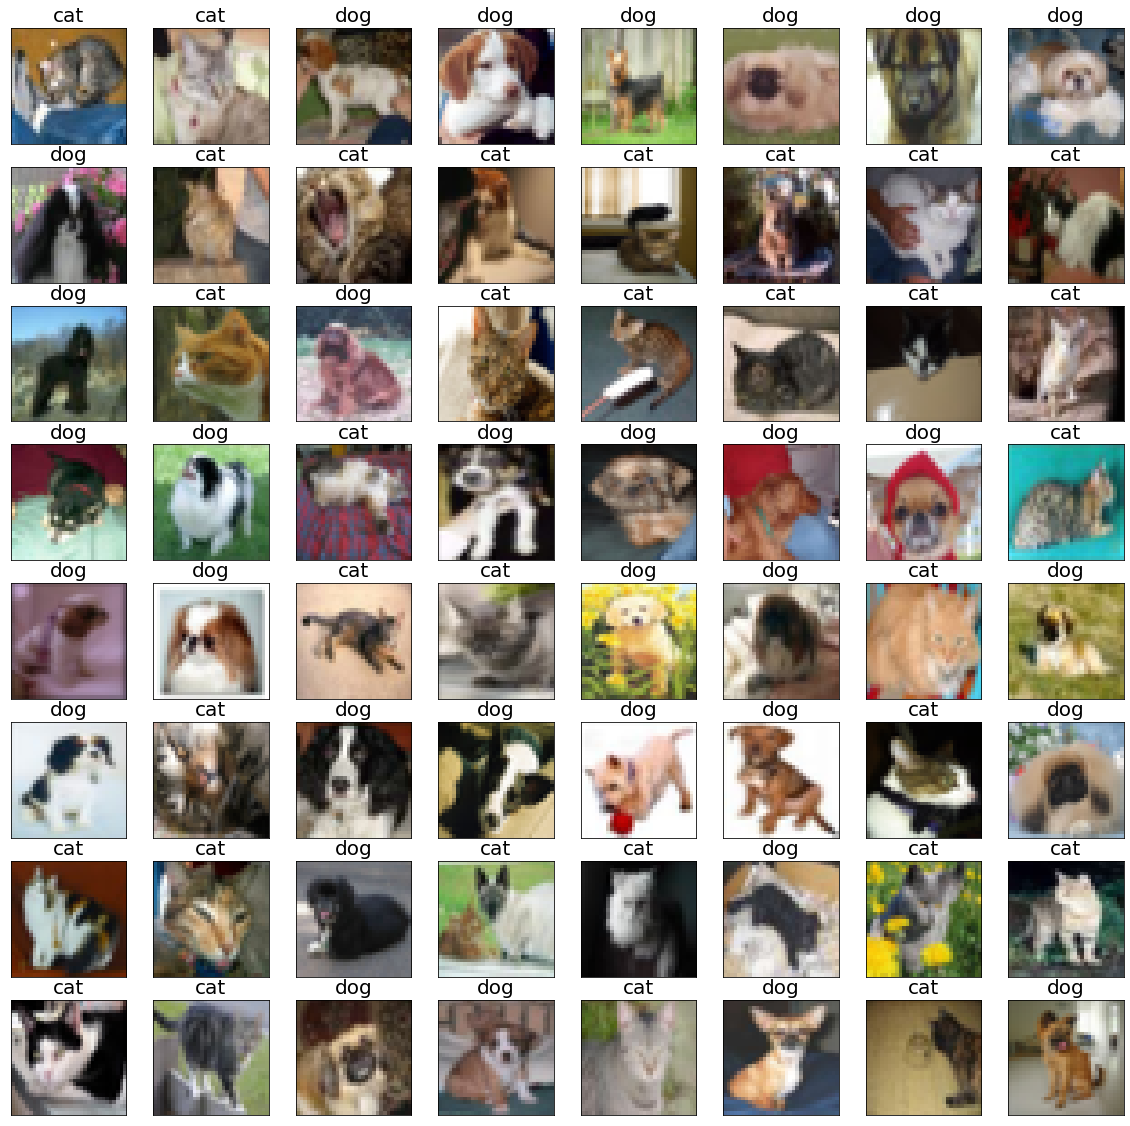

In [1]:
from tensorflow.keras import datasets, layers, models, utils
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck' ]

class_names_sel = ['cat', 'dog']

def select_cats_and_dogs(images, labels):
    N_cats_dogs = 0
    for i in range(images.shape[0]):
        if labels[i][0] == 3 or labels[i][0] == 5: N_cats_dogs += 1
    _, h, w, c = images.shape
    images_sel = np.zeros((N_cats_dogs, h, w, c), np.uint8)
    labels_sel = np.zeros((N_cats_dogs,), np.int32)
    n = 0
    for i in range(images.shape[0]):
        if labels[i][0] == 3 or labels[i][0] == 5:
            np.copyto( images_sel[n], images[i] )
            labels_sel[n] = labels[i][0] // 5
            n += 1
    return images_sel, labels_sel

train_images_sel, train_labels_sel = select_cats_and_dogs(train_images, train_labels)
test_images_sel, test_labels_sel = select_cats_and_dogs(test_images, test_labels)

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( class_names_sel[test_labels_sel[i]], {'fontsize':20} )
    plt.imshow( test_images_sel[i] )

In [2]:
_, H, W, C = train_images_sel.shape
train_x = ( train_images_sel / 255 ).astype('float32')
test_x = ( test_images_sel / 255 ).astype('float32')
print( 'test_x', type(test_x), test_x.shape, test_x.dtype )

test_x <class 'numpy.ndarray'> (2000, 32, 32, 3) float32


In [3]:
num_classes = 2

print( 'test_labels_sel', test_labels_sel.shape, test_labels_sel.dtype )
print( 'test_labels_sel[0] =', test_labels_sel[0] )

train_y = utils.to_categorical(train_labels_sel, num_classes)
test_y = utils.to_categorical(test_labels_sel, num_classes)

print( 'test_y', test_y.shape, test_y.dtype )
print( 'test_y[0] =', test_y[0] )

test_labels_sel (2000,) int32
test_labels_sel[0] = 0
test_y (2000, 2) float32
test_y[0] = [1. 0.]


In [4]:
x = layers.Input( (H, W, C) )
h = layers.Conv2D( 128, (3, 3), padding='same', activation='relu' )(x)
h = layers.MaxPooling2D( (2, 2) )(h)
h = layers.Dropout( 0.5 )(h)
h = layers.Conv2D( 256, (3, 3), padding='same', activation='relu' )(h)
h = layers.MaxPooling2D( (2, 2) )(h)
h = layers.Dropout( 0.5 )(h)
h = layers.Conv2D( 256, (3, 3), padding='same', activation='relu' )(h)
h = layers.MaxPooling2D( (2, 2) )(h)
h = layers.Flatten()(h)
h = layers.Dropout( 0.5 )(h)
h = layers.Dense( 256, activation='relu' )(h)
h = layers.Dropout( 0.5 )(h)
y = layers.Dense(num_classes, activation='softmax')(h)

model = models.Model(x, y)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 256)         0     

Train on 9000 samples, validate on 1000 samples
Epoch 1/40
9000/9000 [==============================] - 6s 713us/sample - loss: 0.6996 - accuracy: 0.5228 - val_loss: 0.6933 - val_accuracy: 0.5070s - loss: 0.7215 - accuracy: - ETA: 5s - loss: 0.7126 - accu - ETA: 3s - loss: 0.7061 - ac - ETA: 1s - loss: 0.7029 
Epoch 2/40
9000/9000 [==============================] - 3s 381us/sample - loss: 0.6794 - accuracy: 0.5749 - val_loss: 0.6697 - val_accuracy: 0.6150 loss: 0.6855 - accuracy:  - ETA: 1s - loss: 0.6843 - accu - ETA: 1s - los
Epoch 3/40
9000/9000 [==============================] - 3s 384us/sample - loss: 0.6540 - accuracy: 0.6224 - val_loss: 0.6116 - val_accuracy: 0.6760
Epoch 4/40
9000/9000 [==============================] - 3s 382us/sample - loss: 0.6241 - accuracy: 0.6594 - val_loss: 0.5929 - val_accuracy: 0.6930 loss: 0.6244 - accuracy: 0.65
Epoch 5/40
9000/9000 [==============================] - 3s 381us/sample - loss: 0.5901 - accuracy: 0.6896 - val_loss: 0.5851 - val_accuracy:

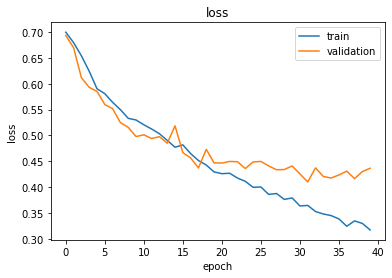

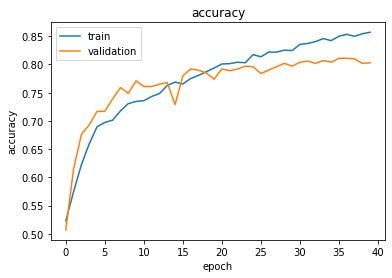

2000/2000 [==============================] - 1s 280us/sample - loss: 0.4007 - accuracy: 0.8265
[loss, accuracy] = [0.40069496440887453, 0.8265]


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=40, batch_size=128, validation_split=0.1)

from modules.plot_history import plot_history
plot_history(hist, 'loss')
plot_history(hist, 'accuracy')

evaluation = model.evaluate( test_x, test_y, batch_size=64)
print( '[loss, accuracy] =', evaluation )

y_pred (2000, 2) float32
y_pred[0] [0.9449286  0.05507149]
class_pred (2000,) int64
class_pred[0] 0


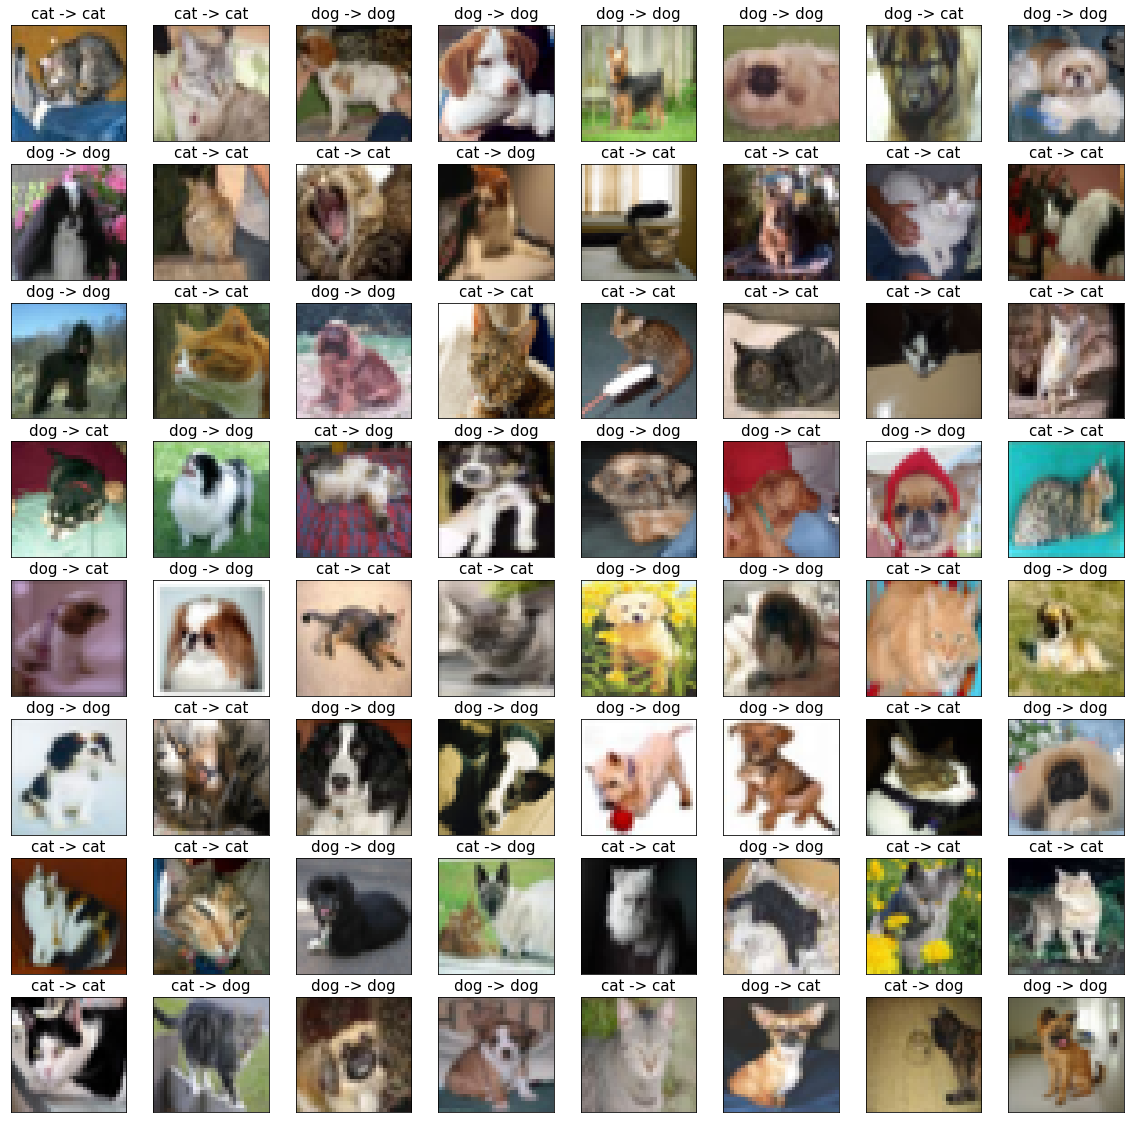

In [6]:
y_pred = model.predict(test_x)
print('y_pred', y_pred.shape, y_pred.dtype)
print('y_pred[0]', y_pred[0])

#class_pred = model.predict_classes( test_x ) # only for sequential model
class_pred = np.argmax(y_pred, axis=1)
print('class_pred', class_pred.shape, class_pred.dtype)
print('class_pred[0]', class_pred[0])

plt.figure( figsize=(20,20) )
for i in range(0,8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(class_names_sel[test_labels_sel[i]] + ' -> '  +
              class_names_sel[class_pred[i]], {'fontsize':15} )
    plt.imshow( test_images_sel[i] )